# Final Seminario 2 - Intro ML: Dic 2024

Se pide evaluar comparativamente el desempeño de 2 modelos de regresión lineal, que son entrenados con el mismo conjunto de datos. Para ello se pide seguir las notas, donde se realizará lo siguiente:

* dividir conjuntos de datos en conjuntos de entrenamiento, validación cruzada y prueba
* entrenar 2 modelos de regresión, habiendo previamente
    * agregado características polinomiales de 2do y 3er grado
    * escalado de características
* comparar ambos modelos, determinando el de mejor desempeño


## Importaciones

In [1]:
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)


## Models de Regresión

Primero, desarrollemos un modelo de regresión. A continuación, se proporciona el conjunto de datos a continuación, que consiste en 50 ejemplos de una característica de entrada `x` y su correspondiente objetivo `y`.

In [ ]:
# Load the dataset from the text file
data = np.loadtxt('data_ex1.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
x = data[:,0]
y = data[:,1]

# Convert 1-D arrays into 2-D because the commands later will require it
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

# TODO completar
print(f"La forma de entradas x es: {x.shape}")
print(f"La forma de la salida y es: {y.shape}")

La forma de entradas x es: (50, 1)
La forma de la salida y es: (50, 1)


Graficamos el conjunto de datos ...

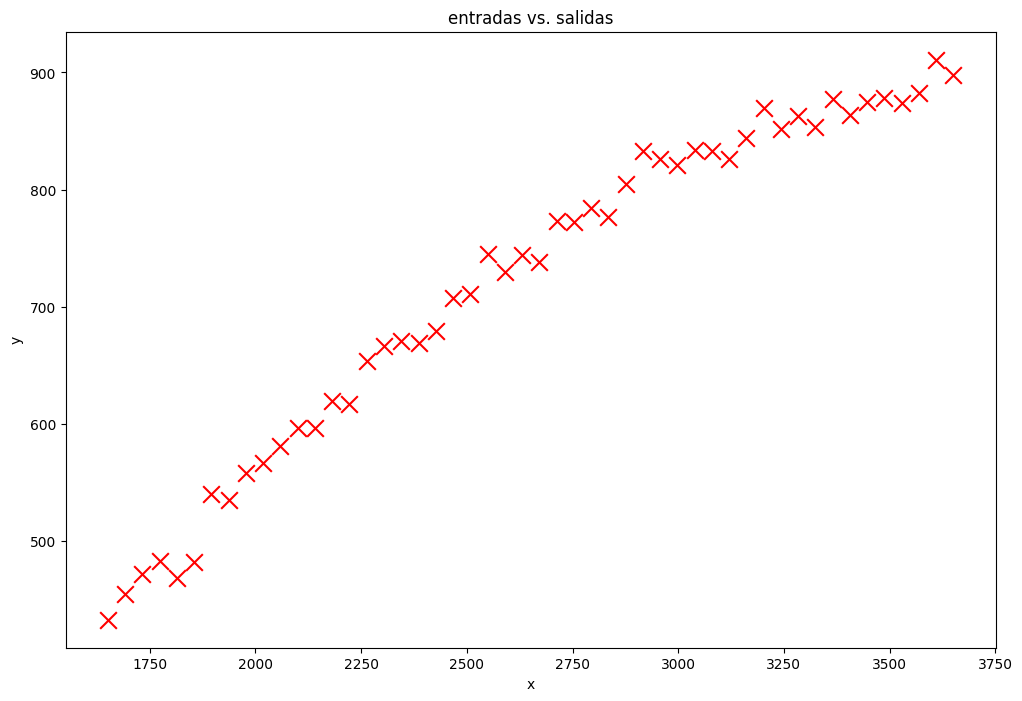

In [3]:
import matplotlib.pyplot as plt

# Plot the entire dataset
def plot_dataset(x, y, title):
    plt.rcParams["figure.figsize"] = (12,8)
    plt.rcParams["lines.markersize"] = 12
    plt.scatter(x, y, marker='x', c='r'); 
    plt.title(title)
    plt.xlabel("x"); 
    plt.ylabel("y"); 
    plt.show()

plot_dataset(x=x, y=y, title="entradas vs. salidas")

## Datos de entrenamiento, validación cruzada y prueba

Vamos a dividir los datos en tres partes:

* ***conjunto de entrenamiento (training set)***
* ***conjunto de validación cruzada (cross validation, también llamado conjunto de validación, desarrollo o dev)***
* ***conjunto de prueba (test set)***

Utiliza la función de Scikit-learn [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) para dividir tus datos en un **60% para entrenamiento**, **20% para validación cruzada** y **20% para prueba**.

In [8]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
# TODO modificar el param test_size al valor deseado
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# TODO modificar el param test_size al valor deseado
# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"la forma del training set (input) es: {x_train.shape}")
print(f"la forma del training set (target) es: {y_train.shape}\n")
print(f"la forma del cross validation set (input) es: {x_cv.shape}")
print(f"la forma del cross validation set (target) es: {y_cv.shape}\n")
print(f"la forma del test set (input) es: {x_test.shape}")
print(f"la forma del test set (target) es: {y_test.shape}")

la forma del training set (input) es: (30, 1)
la forma del training set (target) es: (30, 1)

la forma del cross validation set (input) es: (10, 1)
la forma del cross validation set (target) es: (10, 1)

la forma del test set (input) es: (10, 1)
la forma del test set (target) es: (10, 1)


Grafiquemos nuevamente el conjunto de datos divididos como datos de entrenamiento, validación cruzada o prueba.

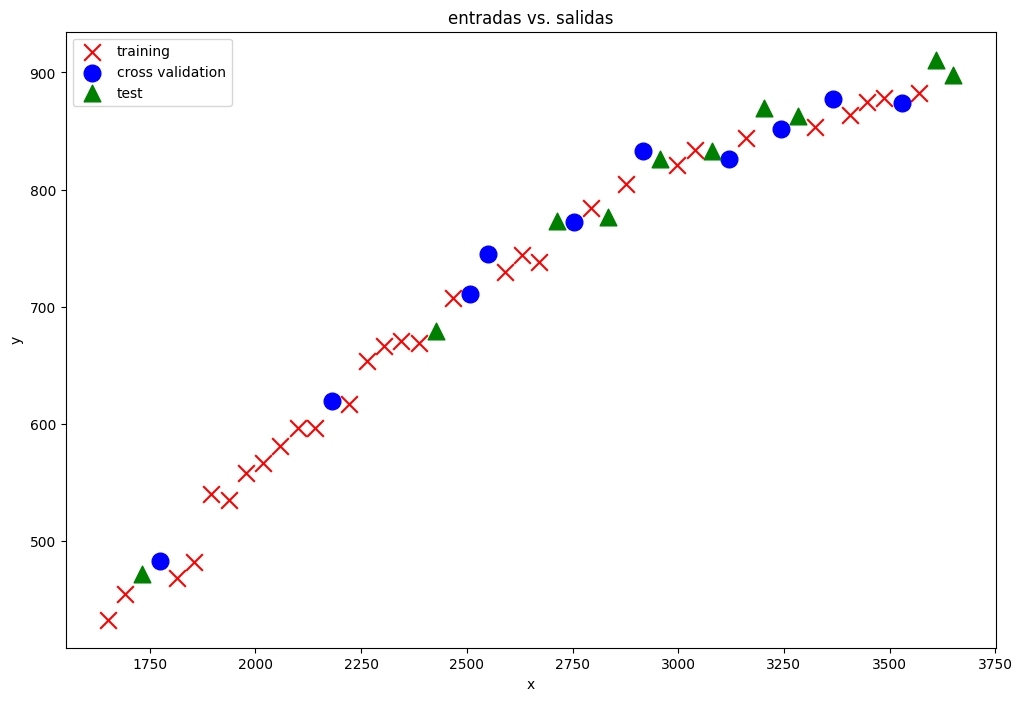

In [11]:
def plot_train_cv_test(x_train, y_train, x_cv, y_cv, x_test, y_test, title):
    plt.scatter(x_train, y_train, marker='x', c='r', label='training'); 
    plt.scatter(x_cv, y_cv, marker='o', c='b', label='cross validation'); 
    plt.scatter(x_test, y_test, marker='^', c='g', label='test'); 
    plt.title(title)
    plt.xlabel("x"); 
    plt.ylabel("y"); 
    plt.legend()
    plt.show()


plot_train_cv_test(x_train, y_train, x_cv, y_cv, x_test, y_test, title="entradas vs. salidas")

## Modelo lineal

### Escalado de características

Usarás el escalado de características mediante la clase [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) de scikit-learn. Esta clase calcula el valor z-score de tus entradas. Como recordatorio, el valor z-score corresponde a la siguiente ecuación:

$$ z = \frac{x - \mu}{\sigma} $$

donde $\mu$ es la media de los valores de la característica y $\sigma$ es la desviación estándar.

Media del training set: 2504.06
Desvio estandar del training set: 574.85


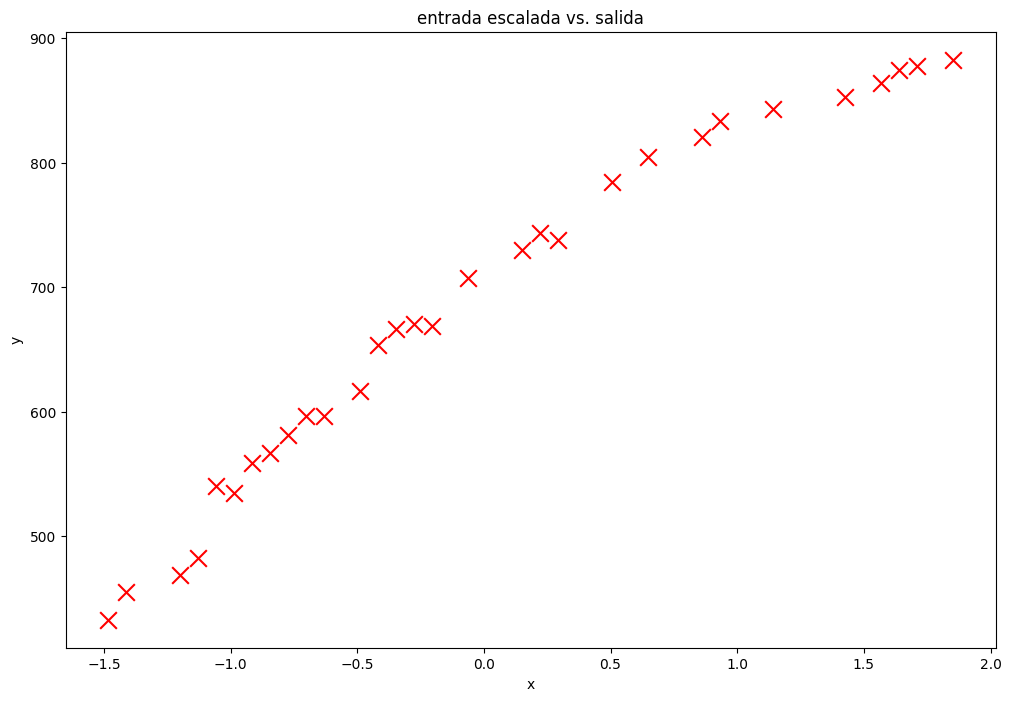

In [13]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
# TODO completar 
X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Media del training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Desvio estandar del training set: {scaler_linear.scale_.squeeze():.2f}")

# Plot the results
plot_dataset(x=X_train_scaled, y=y_train, title="entrada escalada vs. salida")

### Entrenar el modelo

A continuación, crearás y entrenarás un modelo de regresión. Para este ejercicio, utilizarás la clase [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [15]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
# TODO completar empleando el vector de entradas escalado X_train_scaled
linear_model.fit(X_train_scaled, y_train )

LinearRegression()

### Evaluar el Modelo

Para evaluar el rendimiento del modelo, vas a medir el error para los conjuntos de entrenamiento y validación cruzada, empleando la función [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

> nota: dado que entrenaste el modelo con valores escalados (es decir, usando z-score), también deberías alimentar el conjunto de entrenamiento escalado en lugar de sus valores sin procesar.

In [18]:
# Feed the scaled training set and get the predictions
# TODO haz que el modelo prediga los valores de salida 
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function
# TODO calcula el error
print(f"Error medio cuadrático : {mean_squared_error(y_train, yhat)}")

Error medio cuadrático : 812.3874838506631


Ahora, calculando el error para el conjunto de validación cruzada de la misma forma:


> nota: escalar el conjunto de validación cruzada usando el mismo `StandardScaler` que usaste antes, pero cuidado sólo debes llamar a su método [`transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform) en lugar de [`fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform), sabes porqué ??

In [20]:
# Scale the cross validation set using the mean and standard deviation of the training set
# TODO completar
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Valor medio usado para escalar el conjunto de CV: {scaler_linear.mean_.squeeze():.2f}")
print(f"Desvío estándar usado para escalar el conjunto de CV: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Error de Cross validation: {mean_squared_error(y_cv, yhat)}")

Valor medio usado para escalar el conjunto de CV: 2504.06
Desvío estándar usado para escalar el conjunto de CV: 574.85
Error de Cross validation: 1103.5578053904433


## Agregar Características Polinomiales

Ahora que tienes los valores del error MSE para el entrenamiento y la validación cruzada con el modelo lineal, puedes intentar agregar características polinomiales, para ver si puedes obtener un mejor rendimiento. El código será básicamente el mismo, pero con algunos pasos adicionales de preprocesamiento.

### Crear las características adicionales

Febes generar las características polinomiales a partir de tu conjunto de entrenamiento, utilizando la clase [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). Esta clase creará una nueva característica de entrada que contiene los valores cuadrados de la entrada `x` (es decir, grado=2, 3, etc).

In [24]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should 
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]]


A continuación, escalar las entradas para uniformizar el rango de valores.

In [25]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[ 1.43  1.47]
 [-0.28 -0.36]
 [ 1.71  1.84]
 [ 0.22  0.11]
 [ 0.15  0.04]]


Luego, procede a entrenar el modelo; y posteriormente mide el rendimiento del modelo en el conjunto de validación cruzada. 

Como antes, debes asegurarte de realizar las mismas transformaciones que hiciste en el conjunto de entrenamiento. Agregarás el mismo número de características polinomiales y luego escalarás el rango de valores.

In [28]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Error p/ conjunto entrenamiento: {mean_squared_error(y_train, yhat)}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Error p/ conjunto de validación cruzada: {mean_squared_error(y_cv, yhat)}")

Error p/ conjunto entrenamiento: 74.07293555999804
Error p/ conjunto de validación cruzada: 243.70135023956854


Notarás que los errores obtenidos al agregar una característica polinomial de segundo grado, son significativamente mejores en ambos casos: conjunto de entrenamiento y de validación cruzada. 

Por último, deberás introducir una característica polinomial de grado 3 y compara su rendimiento.

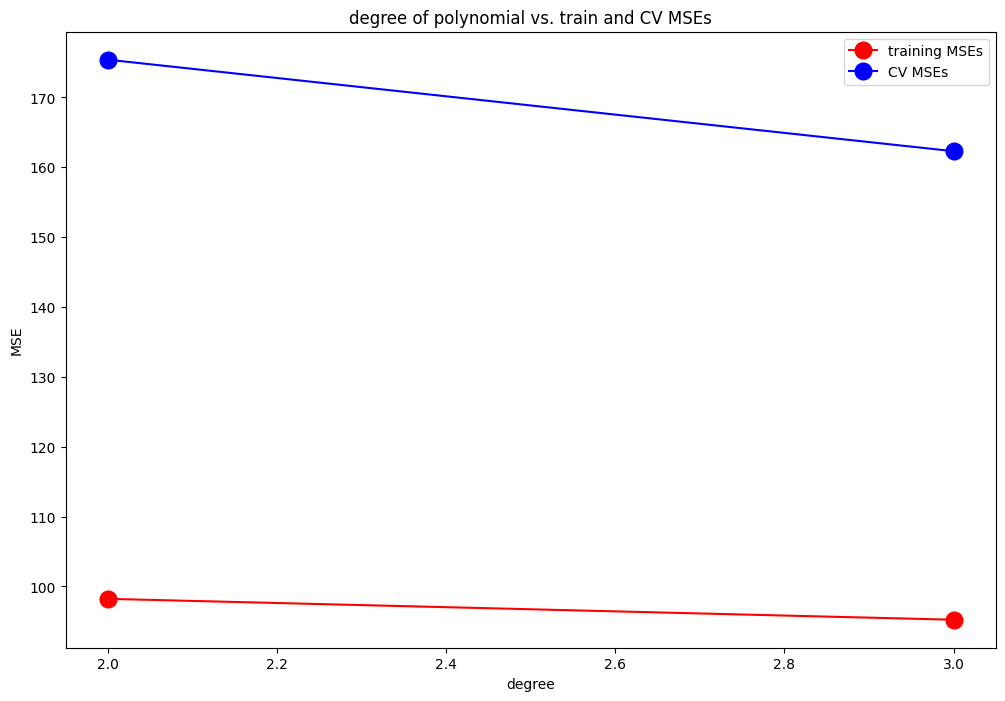

In [33]:
def plot_train_cv_mses(degrees, train_mses, cv_mses, title):
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.title(title)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

# Initialize lists to save the errors, models, and feature transforms
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []
degrees=range(2,4)

# Loop over 2 times. Each adding one more degree of polynomial higher than the last.
for degree in degrees:
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat)
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    X_cv_mapped = poly.transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat)
    cv_mses.append(cv_mse)
    
# Plot the results
plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

### Elegir el mejor modelo

Al seleccionar un modelo, debes elegir uno que tenga un buen desempeño tanto en el conjunto de entrenamiento como en el de validación cruzada. Esto implica que el modelo es capaz de aprender los patrones de tu conjunto de entrenamiento sin sobreajustarse.

Notarás una caída abrupta en el error de validación cruzada de los modelos con grado=1 a grado=2. Esto es seguido por una línea relativamente plana hasta grado=5. 

Sin embargo, después de ese punto, el error de validación cruzada generalmente empeora a medida que agregas más características polinomiales. Con base en esto, puedes decidir usar el modelo con el menor `cv_mse` como el más adecuado para tu aplicación.

In [34]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=2


Luego, puedes publicar el error de generalización calculando el MSE del conjunto de prueba. Como es habitual, debes transformar estos datos de la misma manera en que lo hiciste con los conjuntos de entrenamiento y validación cruzada.

In [35]:
# Add polynomial features to the test set
X_test_mapped = polys[degree-1].transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 95.23
Cross Validation MSE: 162.30
Test MSE: 116.73


<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/patok/intro-ML/blob/main/examen_final_Dic_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>